In [ ]:
#HeartDisease Prediction using Heart Data Features

**Heart Disease Prediction using independent medical features from Patients**

*Importing the Dependencies*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


**Importing the Dataset from Files Section into a pandas Dataframe**

In [ ]:
heart_data=pd.read_csv('/content/heart.csv')

In [ ]:
heart_data.shape
#Displaying the number of rows and columns in the dataset

(303, 14)

In [ ]:
heart_data.head()
#Displaying the first 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.describe()
#Displaying the dataset in a statistical manner for better understanding

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart_data.isnull().sum()
#Finding out if there are any null values and if any how many

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Plotting :** Now we find the correlation between the variables and plot a heat map

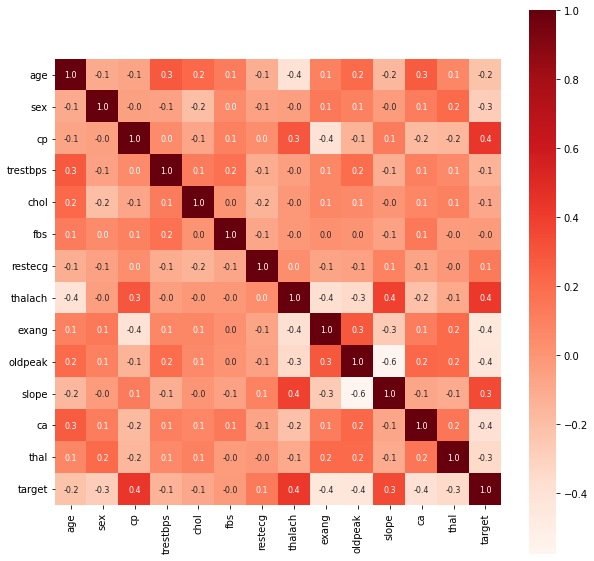

In [211]:
#Plotting the HeatMap
correlation = heart_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [ ]:
heart_data['target'].value_counts()
#Counting the number of positive and negative values with respect to the fact that whether or not the patient has a heart disease

1    165
0    138
Name: target, dtype: int64

In [ ]:
#Splitting the dependent and independent variables into an X and Y variable 
x=heart_data.drop(columns='target',axis=1)
y=heart_data['target']
#Storing the target column values in the independent variable Y 
#Storing the rest of the variables after dropping the target column in X which in turn becomes the dependent variabes 

In [ ]:
#Printing the number of rows and columns of each variable 
print(x.shape)
print(y.shape)

(303, 13)
(303,)


In [ ]:
#Printing the X and Y Variable to ensure that the data stroed in them is correct
print(x)
print(y)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target

**Splitting the data into Training and Test data** : 
we will be using stratify as the dataset is not large enough and there is a possibility that the y_test variable might only have 0's and only 1's.
Stratify helps us to split the data into training and test data with respect to the dependent variable Y

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)

In [ ]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3


In [ ]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2


In [ ]:
#Without stratify there is a possibility of uneven distribution of values in the Y variable : y_train, y_test
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


**Training and Building the Machine Learning Model**: For this experiment we will be using Logistic Regression since the dataset available to us is relatively small.

In [ ]:
model=LogisticRegression()
#As you can see we are currently going with only the default parameter. This will further be enhanced using hyperparameter tuning

In [ ]:
#Model training and checking the prediction accuracy on the training data
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
#Comparing the accuracy of the model by comparing the prediction of the model to the predefined labels in the dataset this will be done later down the line
print(train_pred)

[0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1
 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1
 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
accuracy1=accuracy_score(train_pred,y_train)
print(accuracy1)
#The Model gives us more than 80 percent accuracy on the training data as well

0.8388429752066116


In [ ]:
#prediction on the basis of the test data
test_pred=model.predict(x_test)
print(test_pred)

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0]


In [ ]:
accuracy=accuracy_score(test_pred,y_test)
print(accuracy)
#The Model gives us more than 80 percent accuracy on the test data

0.8852459016393442


**Making a predictive system**: This system is designed to take an input from the user where the user gives the model dependent variables and the model makes a prediction based on those variables to deliver a result

In [ ]:
input_data=(56,1,1,120,240,0,1,169,0,0,0,0,2)
#This is where we will be taking the input
input_data_as_numpy=np.asarray(input_data)#Transforming the input data into a array for ease of access
input_data_reshaped=input_data_as_numpy.reshape(1,-1)#reshaping the data
prediction=model.predict(input_data_reshaped)
print(prediction)

#Using a simple if and else systen to display the output
if(prediction[0]==1):
  print('Patient has a Heart Condition and needs further medical examination')

else:
  print('Patient does not have a Heart Condition')

[1]
Patient has a Heart Condition and needs further medical examination


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


**Saving and Loading the trained model**

In [ ]:
import pickle
#Pickle library helps us easily save and load trained machine learning models

In [ ]:
filename='trained_model.sav'
#Coming up with a file name for our saved model
pickle.dump(model,open(filename,'wb'))
#Opening a file by the name of trained_model and we mention that it will be writing binary or wb

In [ ]:
#Loading the saved model
loaded_model=pickle.load(open('trained_model.sav','rb'))
#rb stands for read binary